In [4]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

In [1]:
from tensorflow.keras import datasets
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

print("{} train samples and {} test samples\n".format(len(x_train), len(x_test)))
print("train samples shape:", x_train.shape)
print("train labels shape:", y_train.shape)


170498071/170498071 [==============================] - 43s 0us/step
50000 train samples and 10000 test samples

train samples shape: (50000, 32, 32, 3)
train labels shape: (50000, 1)


In [2]:
class_names = {
    0: 'airplane',
    1: 'automobile',
    2: 'bird',
    3: 'cat',
    4: 'deer',
    5: 'dog',
    6: 'frog',
    7: 'horse',
    8: 'ship',
    9: 'truck',
}

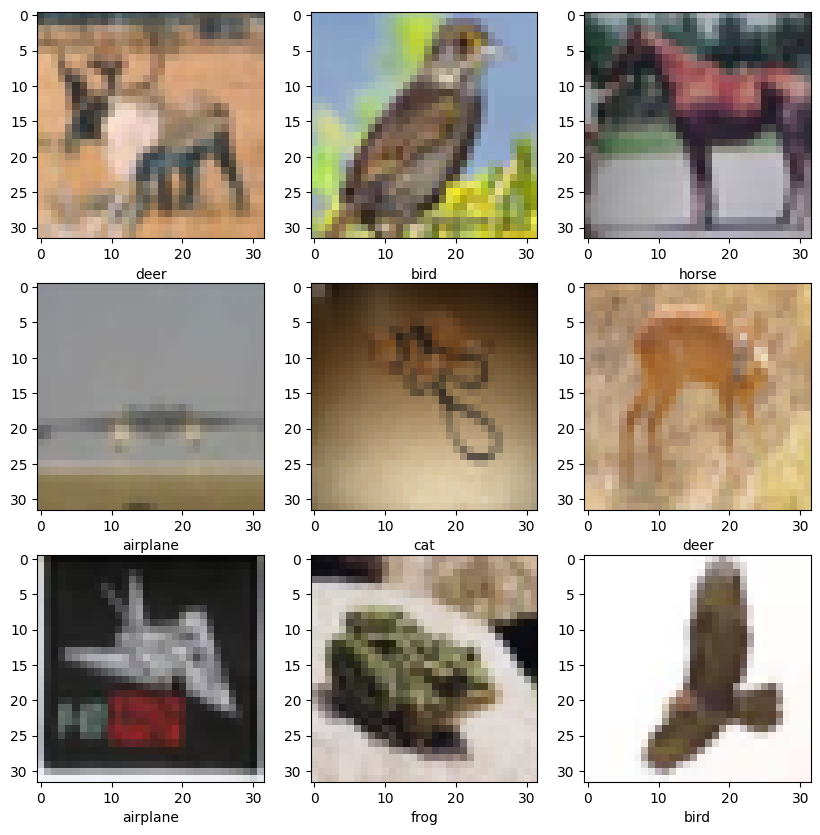

In [5]:
# select a random set of 9 images
idx = np.random.randint(len(x_train) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each sample
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_train[i + idx]) 
    plt.xlabel(class_names[(y_train[i + idx][0])])

# display results
plt.show()

In [6]:
print("before normalization:\n", x_train[0][0][0])

before normalization:
 [59 62 63]


In [7]:
# normalize pixel values
x_train = x_train / 255.
x_test = x_test / 255.
# pixel values after normalization
print("after normalization:\n", x_train[0][0][0])

after normalization:
 [0.23137255 0.24313725 0.24705882]


In [8]:
# label values before one hot encoding
print("before one hot:")
print("class {} represents a {}".format(y_train[0][0], class_names[y_train[0][0]]))

before one hot:
class 6 represents a frog


In [9]:
from keras.utils import to_categorical

# one hot encode labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# label values after one hot encoding
print("after one hot:")
print("class {} represents a {}".format(y_train[0], class_names[np.argmax(y_train[0])]))

after one hot:
class [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.] represents a frog


In [10]:
from tensorflow.keras import Sequential, layers

def build_model():
    model = Sequential()
    model.add(layers.Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D(pool_size=(2,2))) 
    model.add(layers.Conv2D(32, 5, activation='relu', padding='same'))
    model.add(layers.MaxPooling2D(pool_size=(2,2)))  
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(10))
    model.add(layers.Softmax())
    
    model.compile(
        optimizer ='adam',
        loss = 'categorical_crossentropy',
        metrics = ['accuracy'])
    return model
# create model
model = build_model()
# see model details
model.summary()




Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        25632     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)              

In [17]:
%%time
# train model
history = model.fit(x_train, y_train, epochs=10)
# save model to file
model.save('baseline.keras')

# access metrics from training history
print("\ninitial accuracy: {} | latest accuracy: {}".format(history.history["accuracy"][0], history.history["accuracy"][-1]))
print("initial loss: {} | latest loss: {}".format(history.history["loss"][0], history.history["loss"][-1]))

Epoch 1/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3756 - accuracy: 0.8663
Epoch 2/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3607 - accuracy: 0.8713
Epoch 3/10
1563/1563 [==============================] - 20s 13ms/step - loss: 0.3373 - accuracy: 0.8794
Epoch 4/10
1563/1563 [==============================] - 19s 12ms/step - loss: 0.3239 - accuracy: 0.8853
Epoch 5/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.3083 - accuracy: 0.8908
Epoch 6/10
1563/1563 [==============================] - 20s 12ms/step - loss: 0.2955 - accuracy: 0.8932
Epoch 7/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2821 - accuracy: 0.8992
Epoch 8/10
1563/1563 [==============================] - 18s 12ms/step - loss: 0.2694 - accuracy: 0.9043
Epoch 9/10
1563/1563 [==============================] - 18s 11ms/step - loss: 0.2561 - accuracy: 0.9089
Epoch 10/10
1563/1563 [==============================] - 17s 11m

In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print('\ntest accuracy score:', test_acc)


313/313 - 2s - loss: 0.9373 - accuracy: 0.6881 - 2s/epoch - 6ms/step

test accuracy score: 0.6880999803543091


In [13]:
predictions = model.predict(x_test)
# fetch probabilities for each class
print("\nprediction probabilities per class:\n", predictions[0])
# fetch class with the highest probability
print("\npredicted class:", np.argmax(predictions[0]))
print("actual class:", np.argmax(y_test[0]))
# fetch readable class name
print("predicted class name:", class_names[np.argmax(predictions[0])])
# compare with original label
print("actual class name:", class_names[np.argmax(y_test[0])])

313/313 [==============================] - 2s 5ms/step

prediction probabilities per class:
 [1.5755188e-04 8.1007590e-04 1.0470507e-03 7.7897519e-01 1.8050087e-04
 1.4220995e-01 3.7657179e-02 4.7237725e-05 2.8340179e-02 1.0574968e-02]

predicted class: 3
actual class: 3
predicted class name: cat
actual class name: cat


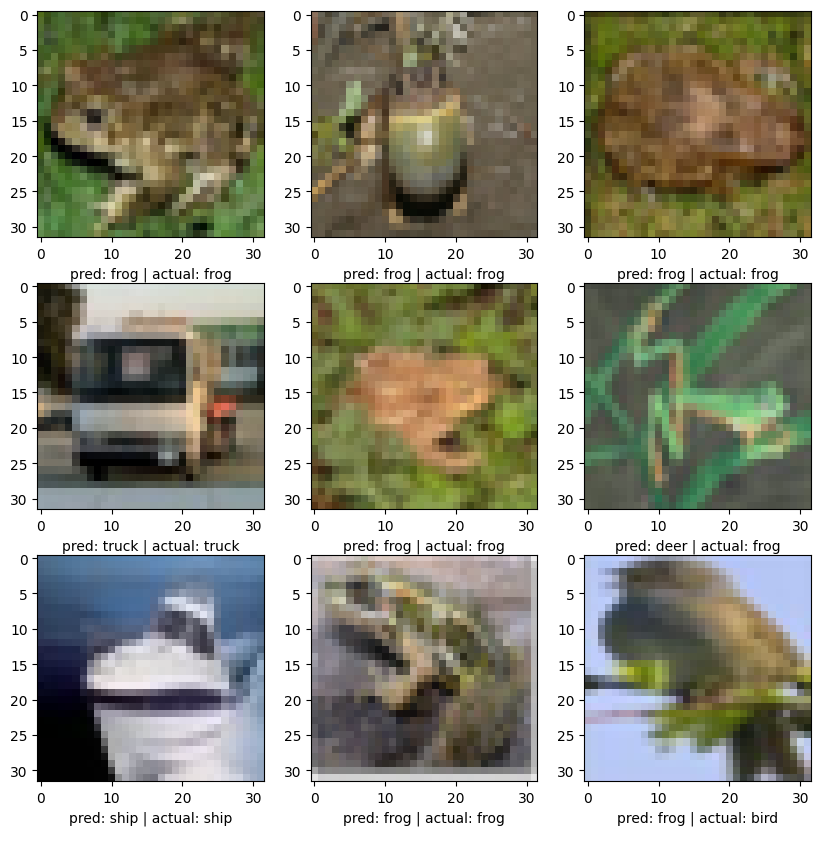

In [14]:
# select a random set of 9 test images
idx = np.random.randint(len(x_test) - 9)

plt.figure(figsize=(10,10))
for i in range(9):
    # plot each test image along with its prediction
    plt.subplot(3, 3, i+1)   
    plt.imshow(x_test[i + idx]) 
    plt.xlabel("pred: {} | actual: {}\n".format(class_names[np.argmax(predictions[i + idx])], class_names[np.argmax(y_test[i + idx])]))

# display results
plt.show()


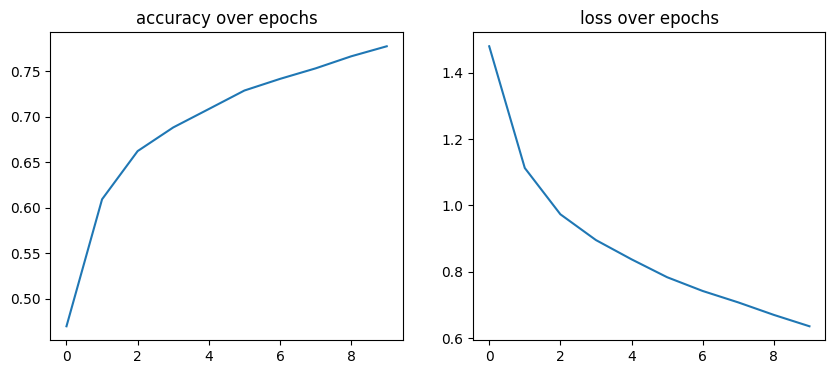

In [15]:
fig, axis = plt.subplots(1, 2, figsize=(10,4)) 
# plot accuracy
axis[0].plot(history.history["accuracy"])
axis[0].set_title("accuracy over epochs")
# plot loss
axis[1].plot(history.history["loss"])
axis[1].set_title("loss over epochs")
plt.show()